In [1]:
!pip install torch torchvision torchaudio
!pip install transformers
!pip install diffusers
!pip install accelerate


In [2]:
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt


In [3]:
from huggingface_hub import login
login("your_key_huggingface")


In [4]:
import os
os.environ["HF_HOME"] = "/content/drive/MyDrive/.cache/huggingface"
os.environ["HF_TOKEN"] = "your_key_huggingface"


In [5]:
from diffusers import StableDiffusionPipeline

# Load the pre-trained Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
pipe.to("cuda")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-2",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

a big house next aside the big river


  0%|          | 0/50 [00:00<?, ?it/s]

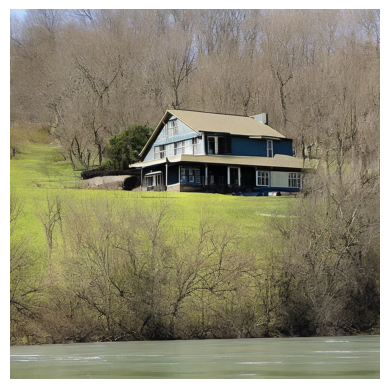

In [11]:
prompt = input()
# "A futuristic cityscape at sunset, with flying cars"

# Generate the image
image = pipe(prompt).images[0]

# Display the generated image
plt.imshow(image)
plt.axis('off')
plt.show()


In [12]:
image.save("generated_image1.png")


  0%|          | 0/50 [00:00<?, ?it/s]

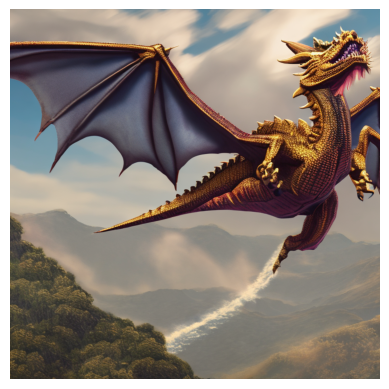

  0%|          | 0/50 [00:00<?, ?it/s]

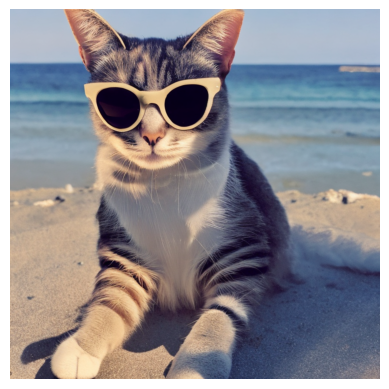

  0%|          | 0/50 [00:00<?, ?it/s]

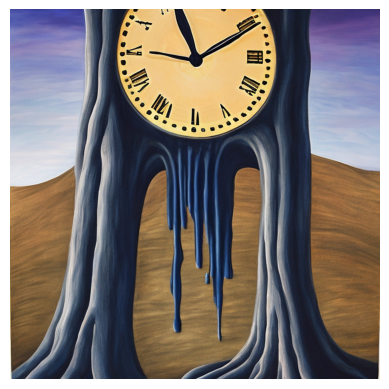

In [8]:
prompts = [
    "A dragon flying over a mountain range",
    "A cat wearing sunglasses, sitting on a beach",
    "A surreal painting of a giant clock melting over a tree"
]

for prompt in prompts:
    image = pipe(prompt).images[0]
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [9]:
from accelerate import Accelerator
accelerator = Accelerator()

pipe = pipe.to(accelerator.device)
